<a href="https://colab.research.google.com/github/shree180103/fashion_mnist_cnn/blob/main/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms # gives functions for manipuilating  images
from torchvision.transforms import ToTensor # used converting img or numpy to tensor
from torch.utils.data import DataLoader # used to create pyton iterables over datset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




## getting our data

In [107]:
# setup training data
from torchvision import datasets

train_data=datasets.FashionMNIST(root="data",# where to download data to
                                 train=True,# do we want training data
                                 download=True,
                                 transform=ToTensor(),
                                 target_transform=None # do we want to transform our target
                                 )
test_data=datasets.FashionMNIST(root="data",# where to download data to
                                 train=False,# do we want training data, if false then gives test data
                                 download=True,
                                 transform=torchvision.transforms.ToTensor(),
                                 target_transform=None # do we want to transform our target
                                 )


In [108]:
len(train_data),len(test_data)

(60000, 10000)

In [109]:
# see the first training examples

image,label=train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [110]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [111]:
class_name_idx=train_data.class_to_idx
class_name_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## visulizing our data

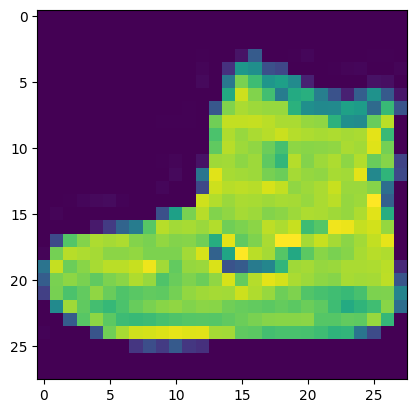

In [7]:
plt.imshow(image.squeeze()) # matplotlib requires (h,w) or (h,w,c) but not (c,h,w)

Text(0.5, 1.0, 'Ankle boot')

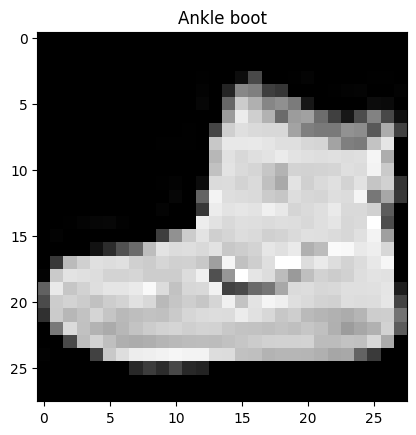

In [8]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

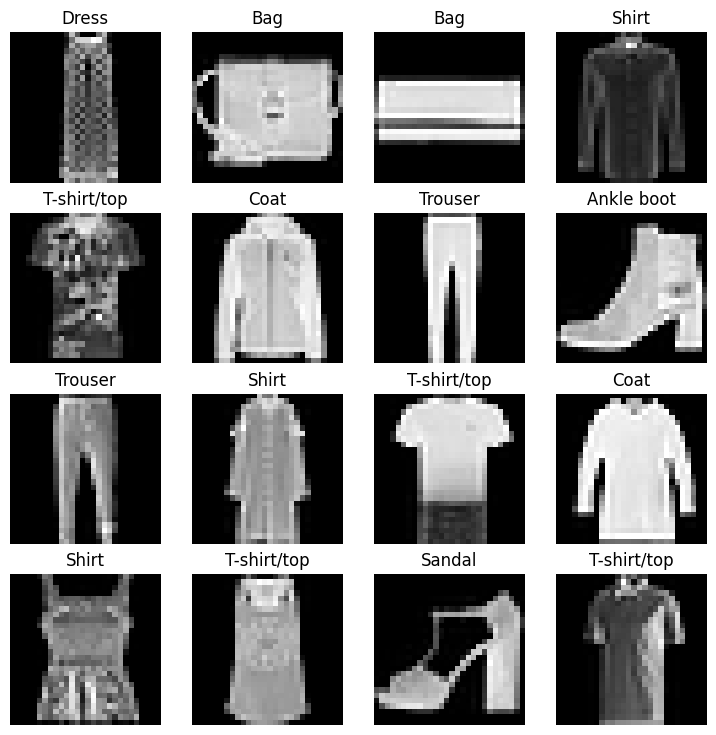

In [9]:
# plot more images
# torch.manual_seed(42)
plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  plt.subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [10]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

##prepare dataloader

right now our dataset is in the form of pytorch dataset

dataloader turns our dataset into a pyton itterable

more specifically, we want to turn our data into mini batches

In [112]:
train_dataloader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)

test_dataloader=DataLoader(dataset=test_data,batch_size=32,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x780d85d174f0>,
 <torch.utils.data.dataloader.DataLoader at 0x780d85d16fe0>)

In [113]:
len(train_dataloader) #thus 1875 batches of 32 training samples

1875

In [114]:
len(test_dataloader) # thus 313 batches of approx 32 testing samples

313

In [115]:
#lets check whats inside the train data loader

train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])


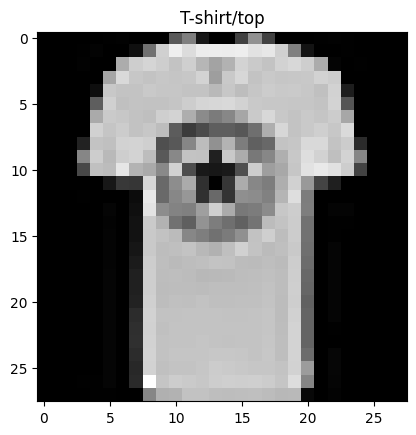

In [116]:
#show a sample
# torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
print(img.shape)


In [131]:
#building a baseline model

class FashionMNISTmodel0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,out_features=hidden_units),
      nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

torch.manual_seed(42)
model=FashionMNISTmodel0(input_shape=28*28,hidden_units=10,output_shape=len(class_names))
model


FashionMNISTmodel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [118]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0351,  0.0094,  0.0126,  ...,  0.0293, -0.0189,  0.0286],
                      [ 0.0081,  0.0198,  0.0123,  ..., -0.0102, -0.0030,  0.0247],
                      [ 0.0053, -0.0248,  0.0303,  ...,  0.0021,  0.0170, -0.0093],
                      ...,
                      [-0.0034,  0.0076,  0.0027,  ..., -0.0330,  0.0263, -0.0211],
                      [ 0.0034, -0.0304, -0.0270,  ..., -0.0024,  0.0133, -0.0047],
                      [-0.0286,  0.0044,  0.0083,  ..., -0.0038, -0.0135,  0.0147]])),
             ('layer_stack.1.bias',
              tensor([ 0.0004,  0.0070,  0.0105,  0.0086, -0.0350,  0.0072,  0.0294,  0.0121,
                       0.0256, -0.0193])),
             ('layer_stack.2.weight',
              tensor([[-0.0803, -0.2885, -0.2888, -0.2384,  0.1616, -0.1860,  0.1061,  0.2190,
                        0.1129, -0.1325],
                      [ 0.2020,  0.1160,  0.0717, -0.0793,  0.2512,  0.1528, -0.

In [86]:
torch.manual_seed(42)
dummy_x=torch.rand([1,1,28,28])
model(dummy_x)

tensor([[-0.1871,  0.2269,  0.7345,  0.2136, -0.0770, -0.1991, -0.1782,  0.2885,
         -0.3024,  0.2575]], grad_fn=<AddmmBackward0>)

In [132]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [91]:
torch.manual_seed(42)
img,label=next(iter(train_dataloader))
y_pred=model(img)
y_pred.shape,label.shape
y_loss=loss_fn(y_pred,label)
y_loss

tensor(2.3010, grad_fn=<NllLossBackward0>)

In [133]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [21]:
from os import P_PID
import requests
import pathlib
from pathlib import Path

# download helper functions from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

downloading helper_functions.py


In [22]:
from helper_functions import accuracy_fn

## creating a function to time our experiments

ML is very experimental

the 2 main things we often track is :

1.the models performance (loss and accuracy)

2.how fast it runs

note: usually model peromance and time taken by model our inversely related


In [122]:
from timeit import default_timer as Timer

def train_time(start:float,end:float):
  # """ prints the difference btw the strt and end time"""

  total_time=end-start
  print(f" Train time is: {total_time:.3f} seconds")
  return total_time


In [123]:
start_time=Timer()

end_time=Timer()

train_time(start_time,end_time)


 Train time is: 0.000 seconds


7.472699962818297e-05

# creating training loop and training a model on batches of data

In [134]:
import tqdm # a progress bar for epochs

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start=Timer()
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_loss,train_acc=0,0
  # add a loop to loop through our training batches
  for batch,(x,y) in enumerate(train_dataloader):
    model.train()

    # foward prop
    y_pred=model(x) # 1 batch of data is used on the model and we get preds of all 32 images

    # calculate loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y,y_pred.argmax(dim=1))


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # print out whats happening
    if batch%400==0:
      print(f"looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples")

  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)


  ## testing
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      test_pred=model(x_test)

      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f"\n train loss:{train_loss:.4f} | train acc:{train_acc:.4f} | test loss:{test_loss:.4f} | test acc:{test_acc:.4f} ")

#calculate train time

train_time_end=Timer()

train_time(start=train_time_start,end=train_time_end)




















  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss:0.5904 | train acc:79.1717 | test loss:0.5095 | test acc:82.0387 
Epoch:1
------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss:0.4763 | train acc:83.3200 | test loss:0.4799 | test acc:83.1969 
Epoch:2
------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss:0.4550 | train acc:84.0517 | test loss:0.4766 | test acc:83.4265 
 Train time is: 36.485 seconds


36.48463489200003

In [135]:
# creating a function for predicting and eval our model not for training but only for test dataset
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:

      y_pred=model(x)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc }

model_results=eval_model(model,test_dataloader,loss_fn,accuracy_fn)
model_results



{'model_name': 'FashionMNISTmodel0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}